# Lab Class Week 3

Here is an example of outputting to file and then plotting the results just to show you what it should look like. You should use whatever plotting package that you are familiar with. To include plotting functionality in the notebook we need to load some libraries using this special header file:

In [1]:
#include "math60082_lab_plot_loader.hpp"

Here is the starter code from the demonstration. I am just writing the file into the current working directory.

In [2]:
// A program to write to a file which can be opened in a spreadsheet
#include <iostream>
// use fstream for opening files for input/output
#include <fstream>
#include <sstream>
using namespace std;

In [3]:
{
  // open up a file stream to write data
  ofstream output;
  // here we are going to use comma separated variables, so end the filename with .csv
  
  // I'm outputing to current working directory
  output.open("test.csv");
  
  if(!output.is_open())
  {
    // NOTE!!!! The file will not open unless the directory exists!!!
    cout << " File not opened \n";
    // stop the program here
    throw;
  }
  // write x vs x^2 to a file
  // each column must be separated by a comma
  // each row goes on a new line
  for(int i=0;i<11;i++)
  {
    double x=i*0.1;
    output << x << " , " << x*x << endl; 
  }
  // file write successful then close file
  cout << " File write successful \n";
  output.close();
}


 File write successful 


Here is an example of plotting the file using gnuplot built into the notebook. Note that we require the x and y axes to be labelled. You will need to use your own plotting program to generate the results, such as excel, python, r or matlab. I am not expecting anyone to understand what I am doing to get this to work!!!

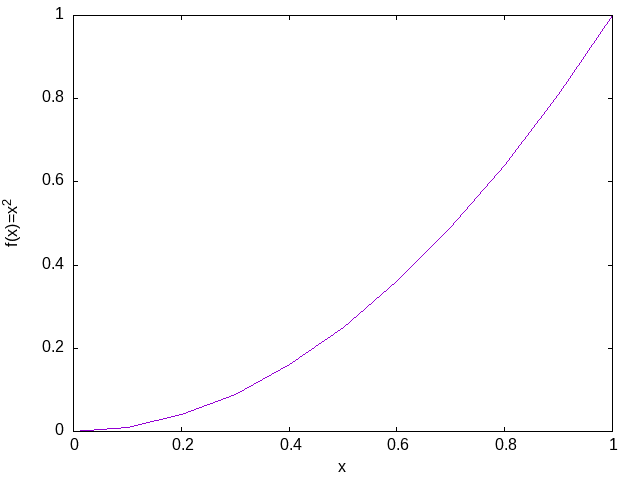

In [4]:
MATH60082::gnuplotImage fig1;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'x'" << endl;
    ss << "set ylabel 'f(x)=x^2'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test.csv' u 1:2 w l";
    fig1 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig1

## Demo Code

In [5]:
double eulersMethod(int n,double a,double b,double alpha)
{
  // local variables
  double h,x,w;
  // intialise values
  h=(b-a)/(double)(n);
  x=a;
  w=alpha;
  // implement Euler's method
  for(int i=0;i<n;i++)
  {
    x = a + i*h; // update value of x to x_i
    w = w + h*(x*exp(3*x)-2.*w); // update w to w_{i+1}
  }
  return w;
}

## Tasks

- Run the program and check the value with $n = 10$.
- Print out the final value for $n = 10$, 20, 40, 80, ..., what happens?
- Calculate the difference between the results $$\Delta_{n,m} = w_n − w_m$$ with $n = 10$ and $m = 20$, $n = 20$ and $m = 40$ and so on
- Can you predict how $\Delta_{n,m}$ behaves for large $n$ and $m$?

## Solutions

In [6]:
{
    cout << eulersMethod(10,0,1.,0.) << endl;
}

2.7609


Result agrees with the value from before.

In [7]:
for(int k=0;k<=8;k++)
{
    int n=10*pow(2,k);
    cout << n << " " << eulersMethod(n,0,1.,0.) << endl;
}

10 2.7609
20 2.98972
40 3.10443
80 3.16178
160 3.19044
320 3.20477
640 3.21194
1280 3.21552
2560 3.21731


In [8]:
{
    double valueOld=0.;
    for(int k=0;k<=8;k++)
    {
        int n=10*pow(2,k);
        double value= eulersMethod(n,0,1.,0.);
        double diff = value - valueOld;
        cout << n << " " << value << " " << diff << endl;
        valueOld=value;
    }
}

10 2.7609 2.7609
20 2.98972 0.228823
40 3.10443 0.114705
80 3.16178 0.0573499
160 3.19044 0.028665
320 3.20477 0.0143289
640 3.21194 0.00716338
1280 3.21552 0.00358141
2560 3.21731 0.00179063


It looks as though the difference between successive results is tending to zero, which is what we would expect if the series is convergent. Also, when we double the number of points we notice that the difference between successive results is halved, indicating that our approximation
$$
w_n = y(b) + O(h)
$$

## Tasks:

- Try implementing the RK2 method: $$k_1 = f(x_i,w_i)$$ $$k_2 = f(x_i+h,w_i+hk_1)$$ $$w_{i+1} = w_i + 0.5\cdot h(k_1+k_2) $$
- What is the empirical estimate for the convergence of this method?

## Solutions

One powerful way to reuse your code in C++ is to use template functions. Here we use the syntax `template <class F>` on the line above the function. Then as an argument, we write `const F &f` as the variable. This can now be any class that has the function `operator()(double  , double)` available, including a normal function declared in your code with the correct arguments. 

In [9]:
template<class F>
double RK2Method(int n,double a,double b,double alpha,const F &f)
{
  // local variables
  double h,x,w;
  // intialise values
  h=(b-a)/(double)(n);
  x=a;
  w=alpha;
  // implement Euler's method
  for(int i=0;i<n;i++)
  {
    x = a + i*h; // update value of x to x_i
    double k1 = f(x,w);
    double k2 = f(x+h,w+h*k1);
    w = w + 0.5*(k1+k2)*h; // update w to w_{i+1}
  }
  return w;
}

In [10]:
double exampleFunction(double x,double y)
{
    return x*exp(3*x)-2.*y;
}

In [11]:
{
    int k=2;
    
    double valueOld=0.;
    double diffOld=0.;
    for(int i=0;i<=8;i++)
    {
        int n=10*pow(k,i);
        double value= RK2Method(n,0,1.,0.,exampleFunction);
        double diff = value - valueOld;
        double R = diffOld/diff;
        double c = log(R)/log(k);
        cout << n << " \t " << value << " \t " << R << " \t " << c << endl;
        valueOld= value;
        diffOld = diff;
    }
}

10 	 3.29789 	 0 	 -inf
20 	 3.23831 	 -55.351 	 -nan
40 	 3.22384 	 4.11644 	 2.0414
80 	 3.22027 	 4.06516 	 2.02331
160 	 3.21939 	 4.03423 	 2.01229
320 	 3.21917 	 4.01752 	 2.0063
640 	 3.21912 	 4.00886 	 2.00319
1280 	 3.2191 	 4.00445 	 2.00161
2560 	 3.2191 	 4.00223 	 2.0008


Clearly, as $c=2$ this method demonstrates second order convergence to the true solution. This means that our estimate 
$$
w_n = y(b) + O(h^2)
$$
corresponds to the theoretical result.

This may seem _obvious_, but there are many instances where the theoretical convergence rates cannot be acheived in real problems. This is caused by a breakdown in the underlying assumptions, such as when the function $f$ is not smooth, or in other words is discontinuous in some sense.